In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications.vgg19 import VGG19
from sklearn.metrics import classification_report

In [2]:
tf.__version__

'2.6.4'

In [3]:
data_dir = "/kaggle/input/mstar-dataset-8-classes/Padded_imgs"

epochs = 5

image_shape = (224, 224)

In [4]:
### GETTING ALL THE CLASSES IN THE DATASET

os.listdir(data_dir)

['ZIL131', 'BTR_60', 'T62', '2S1', 'SLICY', 'BRDM_2', 'D7', 'ZSU_23_4']

In [5]:
### PRINTING FIRST FIVE IMAGES IN ALL THE DIRECTORIES 

for class_ in os.listdir(data_dir):
    print(os.listdir(os.path.join(data_dir,class_))[:5])

['HB15068 (copy).JPG', 'HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG']
['HB03384 (copy).JPG', 'HB03867 (copy).JPG', 'HB03923 (another copy).JPG', 'HB03356 (another copy).JPG', 'HB03821 (copy).JPG']
['HB15068 (copy).JPG', 'HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG']
['HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG', 'HB19422.JPG']
['HB17415.JPG', 'HB18794.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG']
['HB15828.JPG', 'HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG']
['HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG', 'HB19422.JPG']
['HB16440.JPG', 'HB14980.JPG', 'HB15154.JPG', 'HB19538.JPG', 'HB19916.JPG']


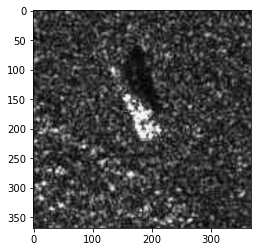

In [6]:
img = cv2.imread(os.path.join(data_dir, '2S1', 'HB14931.JPG' ))

plt.imshow(img);

In [7]:
data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/mstar-dataset-8-classes/Padded_imgs",
    batch_size=16,
    image_size=image_shape,
    shuffle=True
)

Found 9466 files belonging to 8 classes.


In [8]:
images = []
labels = []

# Iterate through the dataset and collect images and labels
for batch_images, batch_labels in data:
    images.extend(batch_images)
    labels.extend(batch_labels)

In [9]:
labels = np.array(labels)

In [10]:
labels.shape

(9466,)

In [11]:
images = np.array(images)

In [12]:
images.shape

(9466, 224, 224, 3)

In [13]:
imagesx = images/255.0

In [14]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input

# Input shape for the network (adjust according to your data)
input_shape = (224, 224, 3)

# Create an input layer
input_tensor = Input(shape=input_shape)

# Create MobileNetV1 model
mobilenet_model = MobileNet(input_shape=input_shape, include_top=True, weights=None, classes=8)

# Summary of the model architecture
#mobilenet_model.summary()
flatten_layer = Flatten()
dense_layer_1 = Dense(256, activation='relu')
prediction_layer = Dense(8, activation='softmax')

In [15]:
from tensorflow.keras import models
model = models.Sequential([
    mobilenet_model,
   # flatten_layer,
   # dense_layer_1,
   # prediction_layer
])

In [16]:
#model.compile(
#optimizer = 'adam',
#loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#metrics = ['accuracy'])

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(imagesx, labels, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss = SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=['accuracy'])

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)
y_temp = to_categorical(y_temp, num_classes=8)

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_temp, y_temp))

Epoch 1/50
237/237 [==============================] - 48s 165ms/step - loss: 1.5753 - accuracy: 0.3732 - val_loss: 2.4512 - val_accuracy: 0.0539
Epoch 2/50
237/237 [==============================] - 36s 151ms/step - loss: 0.9214 - accuracy: 0.6193 - val_loss: 3.7803 - val_accuracy: 0.1426
Epoch 3/50
237/237 [==============================] - 36s 151ms/step - loss: 0.4355 - accuracy: 0.8212 - val_loss: 7.1433 - val_accuracy: 0.1404
Epoch 4/50
237/237 [==============================] - 36s 151ms/step - loss: 0.3124 - accuracy: 0.8607 - val_loss: 0.2468 - val_accuracy: 0.8981
Epoch 5/50
237/237 [==============================] - 36s 151ms/step - loss: 0.2440 - accuracy: 0.8970 - val_loss: 0.1981 - val_accuracy: 0.9234
Epoch 6/50
237/237 [==============================] - 36s 151ms/step - loss: 0.1945 - accuracy: 0.9172 - val_loss: 0.1725 - val_accuracy: 0.9287
Epoch 7/50
237/237 [==============================] - 36s 151ms/step - loss: 0.1588 - accuracy: 0.9336 - val_loss: 0.1520 - val_ac

In [21]:
.shape

(1894, 8)

In [22]:
from tensorflow.keras.models import load_model

# Assuming you have already trained and compiled your model
# Save the model to a single file, including architecture, weights, and optimizer state
model.save("mob_new_sareb_model.h5")

Accuracy plot saved at: /kaggle/working/accuracy_plot.png


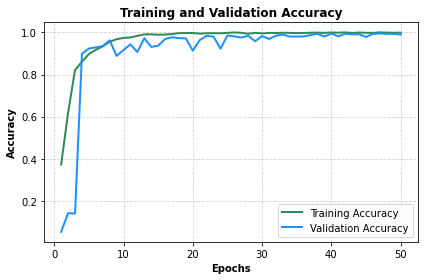

Loss plot saved at: /kaggle/working/loss_plot.png


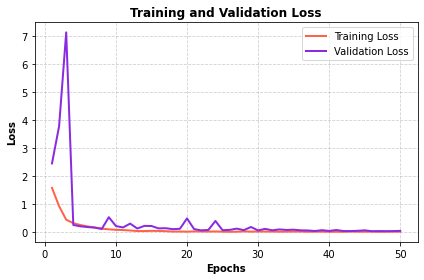

In [23]:
import os
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Retrieve accuracy and loss values from training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot training & validation accuracy
    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='#2E8B57', linewidth=2)
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='#1E90FF', linewidth=2)
    plt.title('Training and Validation Accuracy', fontweight='bold')
    plt.xlabel('Epochs', fontweight='bold')
    plt.ylabel('Accuracy', fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save accuracy plot at 300 DPI
    acc_plot_path = os.path.join('/kaggle/working/', 'accuracy_plot.png')
    plt.savefig(acc_plot_path, dpi=300)
    print(f"Accuracy plot saved at: {acc_plot_path}")
    plt.show()

    # Plot training & validation loss
    plt.figure()
    plt.plot(epochs, loss, label='Training Loss', color='#FF6347', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='#8A2BE2', linewidth=2)
    plt.title('Training and Validation Loss', fontweight='bold')
    plt.xlabel('Epochs', fontweight='bold')
    plt.ylabel('Loss', fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save loss plot at 300 DPI
    loss_plot_path = os.path.join('/kaggle/working/', 'loss_plot.png')
    plt.savefig(loss_plot_path, dpi=300)
    print(f"Loss plot saved at: {loss_plot_path}")
    plt.show()

# Usage
plot_training_history(history)

In [25]:
np.save('X_testm.npy',X_temp)

In [26]:
np.save('y_tempm.npy',y_temp)

In [ ]:
train_size = int(len(data)*.7)                             
val_size = int(len(data)*.2)                             
test_size = int(len(data)*.2)


print(f"Train data size {train_size}")
print(f"Train data size {test_size}")
print(f"Train data size {val_size}")

In [ ]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

In [ ]:
base_model = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape+(3,)
)

base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
input = Input(shape=image_shape+(3,))
x = base_model(input)
x = Flatten()(x)
x = Dense(256,activation = "relu")(x)
output= Dense(units=8, activation="softmax")(x)

model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, epochs = epochs,validation_data=val_data)

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss' )
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'loss' )
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(test_data) ,axis=1).numpy()

In [ ]:
y_true = []

for batch in test_data.as_numpy_iterator():
    X, y = batch
    y_true.append(list(y))

In [ ]:
y_true = np.array(sum(y_true, []))

In [ ]:
print(classification_report(y_true, y_pred))